<a href="https://colab.research.google.com/github/AmalSalhi1/TP1ML/blob/main/reseauneuronnes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d ahmedaliraja/customer-satisfaction-10k -p /content/datasets

Dataset URL: https://www.kaggle.com/datasets/ahmedaliraja/customer-satisfaction-10k
License(s): other
  0% 0.00/33.4k [00:00<?, ?B/s]
100% 33.4k/33.4k [00:00<00:00, 48.5MB/s]


In [4]:
!unzip /content/datasets/customer-satisfaction-10k.zip

Archive:  /content/datasets/customer-satisfaction-10k.zip
  inflating: Customer-survey-data.csv  


In [30]:
import pandas as pd
df = pd.read_csv("/content/Customer-survey-data.csv")
print(df.head())

   Customer  \
0         1   
1         2   
2         3   
3         4   
4         5   

   How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied  \
0                                                5.0                                                                                                          
1                                                3.0                                                                                                          
2                                                4.0                                                                                                          
3                                                5.0                                                                                                          
4                                                2.0                                                              

In [6]:
# @title supprimer des lignes avec valeurs manquantes
df = df.dropna()

In [7]:
# @title separer features et target
X = df.drop(columns=['Customer', 'Was your order accurate? Please respond yes or no.'])
y = df['Was your order accurate? Please respond yes or no.']

In [8]:
# @title entrainement et test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# @title Standardisation data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train)
X_test_1 = scaler.transform(X_test)

In [10]:
# @title importer les bib necessaires
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [11]:
# @title construire le modele reseau de neuronne
# Définir le modèle
model = Sequential()

# Ajouter des couches
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Utilisez 'softmax' pour une classification multiclasse

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Utilisez 'categorical_crossentropy' pour une classification multiclasse


In [22]:
# Assurez-vous que les données sont des tableaux NumPy
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)

# Vérifiez les types de données
print(X_train.dtype, y_train.dtype)

# Assurez-vous que y_train contient des valeurs numériques
print(np.unique(y_train))

# Si y_train contient des catégories, encodez-les en numériques
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

# Vérifiez à nouveau les valeurs uniques après encodage
print(np.unique(y_train))

# Maintenant, entraînez le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)


float64 object
['No' 'Yes']
[0 1]
Epoch 1/50
595/595 [==============================] - 4s 4ms/step - loss: 0.6085 - accuracy: 0.7105 - val_loss: 0.6070 - val_accuracy: 0.7238
Epoch 2/50
595/595 [==============================] - 5s 8ms/step - loss: 0.6029 - accuracy: 0.7139 - val_loss: 0.5888 - val_accuracy: 0.7238
Epoch 3/50
595/595 [==============================] - 3s 5ms/step - loss: 0.6007 - accuracy: 0.7139 - val_loss: 0.5899 - val_accuracy: 0.7238
Epoch 4/50
595/595 [==============================] - 3s 4ms/step - loss: 0.5992 - accuracy: 0.7139 - val_loss: 0.5910 - val_accuracy: 0.7238
Epoch 5/50
595/595 [==============================] - 2s 3ms/step - loss: 0.5993 - accuracy: 0.7139 - val_loss: 0.5928 - val_accuracy: 0.7238
Epoch 6/50
595/595 [==============================] - 2s 3ms/step - loss: 0.5993 - accuracy: 0.7139 - val_loss: 0.5884 - val_accuracy: 0.7238
Epoch 7/50
595/595 [==============================] - 1s 2ms/step - loss: 0.5988 - accuracy: 0.7139 - val_loss: 0.

In [39]:
# Ensure NumPy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Check data types
print(X_test.dtype, y_test.dtype)

# If necessary, apply data cleaning or preprocessing techniques

# Ensure y_test contains numerical values
if isinstance(y_test[0], str):
  # Convert string labels to numerical values using LabelEncoder
  from sklearn.preprocessing import LabelEncoder
  label_encoder = LabelEncoder()
  y_test = label_encoder.fit_transform(y_test)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

float64 object
59/59 [==============================] - 0s 6ms/step - loss: 0.5978 - accuracy: 0.7113
Loss: 0.5977792143821716
Accuracy: 0.7112902998924255


In [40]:
# Faire des prédictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Seulement si vous faites une classification binaire

# Afficher quelques prédictions
print(y_pred_classes[:10])


59/59 [==============================] - 0s 3ms/step
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


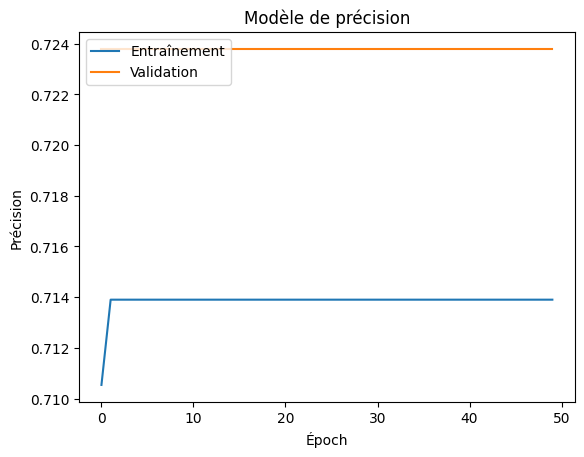

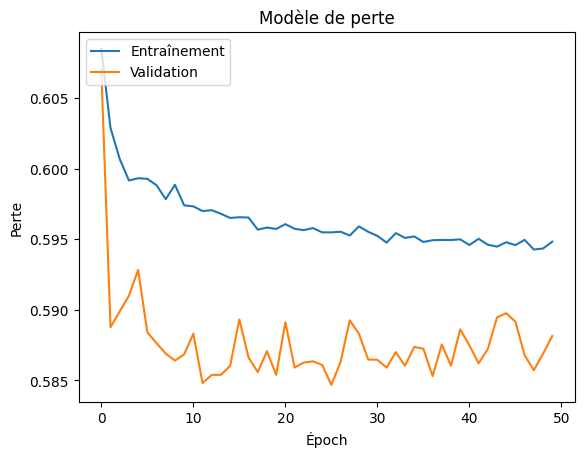

In [41]:
import matplotlib.pyplot as plt

# Résumé de l'entraînement
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modèle de précision')
plt.xlabel('Époch')
plt.ylabel('Précision')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modèle de perte')
plt.xlabel('Époch')
plt.ylabel('Perte')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()
